In [30]:
import pandas as pd
import numpy as np
import scipy as scp

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt

import joblib

import itertools

from datetime import datetime

now=datetime.now()

models = OrderedDict([
          ('Knn', KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression(max_iter=10000)),
          ('Linear SVM', SVC(kernel='linear', probability=True)),
          ('Poly SVM', SVC(kernel='poly',  probability=True)),
          ('RBF SVM', SVC(kernel='rbf',  probability=True)),
          ('Classification Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('MLP', MLPClassifier(activation='tanh',solver='adam', max_iter=10000,
                                                  learning_rate_init=0.001, random_state=42)),
          ('AdaBoost',AdaBoostClassifier(random_state=42,base_estimator = RandomForestClassifier())),
          ('GBoost',GradientBoostingClassifier(random_state=42)),
          ('Knn Regression', KNeighborsRegressor(weights='distance')),
          ('Linear Regression', LinearRegression(fit_intercept=True,normalize=True)),
          ('Ridge', Ridge(fit_intercept=True,normalize=True)),
          ('Lasso', Lasso()),  
          ('Tree Regression', DecisionTreeRegressor()),
          ('Random Forest Regression', RandomForestRegressor(random_state=42)),
          ('GBoost Regression', GradientBoostingRegressor(random_state=42)),
          ('Gaussian NB', GaussianNB()),
          ('Multinomial NB', MultinomialNB()),
          ('Complement NB',ComplementNB()),
          ('AdaBoost Regression',AdaBoostRegressor(random_state=42,base_estimator=KNeighborsRegressor()))
          ])


def training(X,y,model='Logistic Regression',cv=5,score='accuracy_score',p_name=now.strftime('%m-%Y'),save=False):
    # X      : array-like or sparse matrix, shape (n_samples, n_features)
    # y      : array-like of shape (n_samples,)
    # model  : string, classification model ::
    #                - Logistic Regression (default)
    #                - Knn (K - nearest neighbours)
    #                - Linear SVM
    #                - Poly SVM
    #                - RBF SVM
    #                - Classification Tree
    #                - Random Forest
    #                - MLP (Multi Layer Perceptron)
    #                - AdaBoost
    #                - GBoost (Gradient Boosting)
    # cv     : int, cross-validation generator, default=5
    # score  : string, strategy to evaluate the performance of the cross-validated model on the test set ::
    #                - f1_score
    #                - accuracy_score
    #                - precision_score
    #                - neg_mean_squared_error (for regression problem
    #p_name  : string, name of the project/kaggle

    
    
    scorers_class = {'f1_score': make_scorer(f1_score),
              'accuracy_score': make_scorer(accuracy_score),
              'precision_score': make_scorer(precision_score)}
    scorers_regr  = {'mse': make_scorer(mean_squared_error,greater_is_better=False),
              'mae': make_scorer(mean_absolute_error,greater_is_better=False),
              'r2': make_scorer(r2_score)}
   
    try:
        filename = model+'.sav'
        gs=joblib.load(filename)
        message=filename + ' already exists'
        print(message)
        return gs
        
    except:

        if model=='Knn':
            n_neighbors=np.arange(1,30,1)
            knn=models[model]
            gs = GridSearchCV(knn,param_grid={"n_neighbors": n_neighbors},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Gaussian NB':
            var_smoothing=np.logspace(-10,-3,30)
            gnb=models[model]
            gs = GridSearchCV(gnb,param_grid={"var_smoothing": var_smoothing},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            if scp.sparse.issparse(X):
                Z=X.toarray()
                gs.fit(Z, y)
            else:
                gs.fit(X, y)

        if model=='Multinomial NB':
            alpha=np.logspace(-3,0,20)
            mnb=models[model]
            gs = GridSearchCV(mnb,param_grid={"alpha": alpha},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Complement NB':
            alpha=np.logspace(-3,0,20)
            mnb=models[model]
            gs = GridSearchCV(mnb,param_grid={"alpha": alpha},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)
            
        if model=='Logistic Regression':
            C  = np.logspace(-3,2,10)
            lr = models[model]
            gs = GridSearchCV(lr,param_grid={"C": C},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Linear SVM':
            C=np.logspace(-3,2,10)
            lsvm=models[model]
            gs = GridSearchCV(lsvm,param_grid={"C": C},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='RBF SVM':
            gamma=np.logspace(-4,1,10)
            C=np.logspace(-3,3,10)
            rsvm=models[model]
            gs = GridSearchCV(rsvm,param_grid={"C": C,"gamma":gamma},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Classification Tree':
            max_depth=np.arange(1,50,1)
            ct=models[model]
            gs = GridSearchCV(ct,param_grid={"max_depth": max_depth},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Random Forest':
            max_depth=np.arange(1,50,5)
            n_estimators=np.arange(1,50,5)
            rf=models[model]
            gs = GridSearchCV(rf,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='MLP':
            hidden_layer_sizes=[(12,4,2),(6,5,4,3,2),(7,6,5,4,3,2),(8,7,6,5,4,3,2)]
            mlp=models[model]
            gs = GridSearchCV(mlp,param_grid={"hidden_layer_sizes": hidden_layer_sizes},scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='AdaBoost':
            param_grid = {"algorithm" : ['SAMME', 'SAMME.R'],
                  "n_estimators" : np.arange(1,50,1)
                 }
            ab=models[model]
            gs = GridSearchCV(ab,param_grid=param_grid,scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='GBoost':
            param_grid = {"n_estimators": np.arange(1,100,2)}
            gb=models[model]
            gs = GridSearchCV(gb,param_grid=param_grid,scoring=scorers_class,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)
            
        if model=='Knn Regression':
            n_neighbors=[1,2,3,4,5,10,20,30]
            gb=models[model]
            gs = GridSearchCV(gb,param_grid={"n_neighbors": n_neighbors},scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Ridge':
            alpha  = np.logspace(0,1,5)
            lr = models[model]
            gs = GridSearchCV(lr,param_grid={"alpha": alpha},scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Lasso':
            alpha  = np.logspace(0,5,5)
            lr = models[model]
            gs = GridSearchCV(lr,param_grid={"alpha": alpha},scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Tree Regression':
            max_depth=[30,40,50,100]
            rt=models[model]
            gs = GridSearchCV(rt,param_grid={"max_depth": max_depth},scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='Random Forest Regression':
            max_depth=np.arange(1,100,10)
            n_estimators=np.arange(3,21,3)
            rf=models[model]
            gs = GridSearchCV(rf,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)

        if model=='GBoost Regression':
            max_depth=np.arange(1,100,1)
            n_estimators=np.arange(1,100,2)
            br=models[model]
            gs = GridSearchCV(br,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)
            
        if model=='AdaBoost Regression':
            param_grid = {#"learning_rate" : np.logspace(0,1,10),
                  "n_estimators" : np.arange(1,50,2)
                 }
            ab=models[model]
            gs = GridSearchCV(ab,param_grid=param_grid,scoring=scorers_regr,refit=score,cv=cv,n_jobs=-3,verbose=2)
            gs.fit(X, y)
    
        if save==True:
            save_model(gs,model)
            
        print('best score = ', gs.best_score_)
        print('best parameters = ', gs.best_params_)
    return gs 
    
    
    

    
def features_identification(X, min_fraction_unique=0.05):
    # X : pd.DataFrame, dataframe

    unique_fraction      = X.apply(lambda col: len(pd.unique(col))/len(col))
    print (unique_fraction.shape)
    categorical_features = unique_fraction.index[unique_fraction<min_fraction_unique].tolist()
    numerical_features   = unique_fraction.index[unique_fraction>=min_fraction_unique].tolist()

    return categorical_features,numerical_features    
    
    
def preprocessing(X):
    # X : pandas dataframe
    
    categorical_features, numeric_features  = features_identification(X)
    
    print (categorical_features, ' CAT')
    print (numeric_features, 'NUM')
    
    numeric_transformer = Pipeline(steps=[('imputer_numeric', KNNImputer(n_neighbors=4)),
                                            ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[('imputer_categorical', SimpleImputer(strategy='most_frequent')),
                                                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    return preprocessor


def graph(X,label):
    
    cmap1 = sns.color_palette("crest", as_cmap=True)
    
    categorical_features, numeric_features  = features_identification(X)
    i=0
    for cat in categorical_features:
        shape_color=len(X[cat].unique())
        plt.figure(i)
        sns.countplot(y=label, hue=cat, data=X, palette=sns.color_palette("YlGn", shape_color))
        i+=1
    for num in numeric_features:
        shape_color=len(X[label].unique())
        X.pivot(columns=[label])[num].plot(kind = 'hist', stacked=True,bins=80,figsize=(15,7),color=sns.color_palette("YlGn", shape_color))
        plt.xlabel(num)
        
        
        
        
        


def plot_confusion_matrix(cm,target_names,title='Confusion matrix', cmap=None,normalize=True):

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()

    
    
def plot_correlation_matrix(X, size=(8,3) ):
    corr = X.corr()
    f, ax = plt.subplots(figsize=size)
    cmap = sns.diverging_palette(245, 10, as_cmap=True)
    sns.heatmap(corr, cmap=cmap,vimax=1,vimin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
    
def save_model(model, name):
    filename = name+'.sav'
    joblib.dump(model, filename)

In [31]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GB_reg=training(X_train,y_train,model='GBoost Regression',cv=5,score='r2')

Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-3)]: Done 1918 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-3)]: Done 3248 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-3)]: Done 5512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-3)]: Done 8432 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-3)]: Done 11992 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-3)]: Done 14056 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-3)]: Done 16484 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-3)]: Done 19240 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-3)]: Done 22316 tasks      | elapsed:  9.5min


best score =  0.4292708129475994
best parameters =  {'max_depth': 1, 'n_estimators': 91}


[Parallel(n_jobs=-3)]: Done 24750 out of 24750 | elapsed: 10.4min finished


PREDICT TRAIN
R2 score : 0.58
Mean squared error: 2534.95
PREDICT TEST
R2 score : 0.48
Mean squared error: 42.22


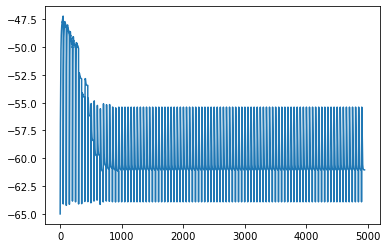

In [33]:
plt.plot(GB_reg.cv_results_['mean_test_mae'])
preds = GB_reg.predict(X_train)
print('PREDICT TRAIN')
print("R2 score : %.2f" % r2_score(y_train,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_train,preds))

preds = GB_reg.predict(X_test)
print('PREDICT TEST')
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Mean squared error: %.2f" % mean_absolute_error(y_test,preds))

In [34]:
X.shape

(442, 10)